In [6]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
colNames = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']
data = pd.read_csv("./kc_house_data.csv", names=colNames, header=0)

In [7]:
corrmat = data.corr()

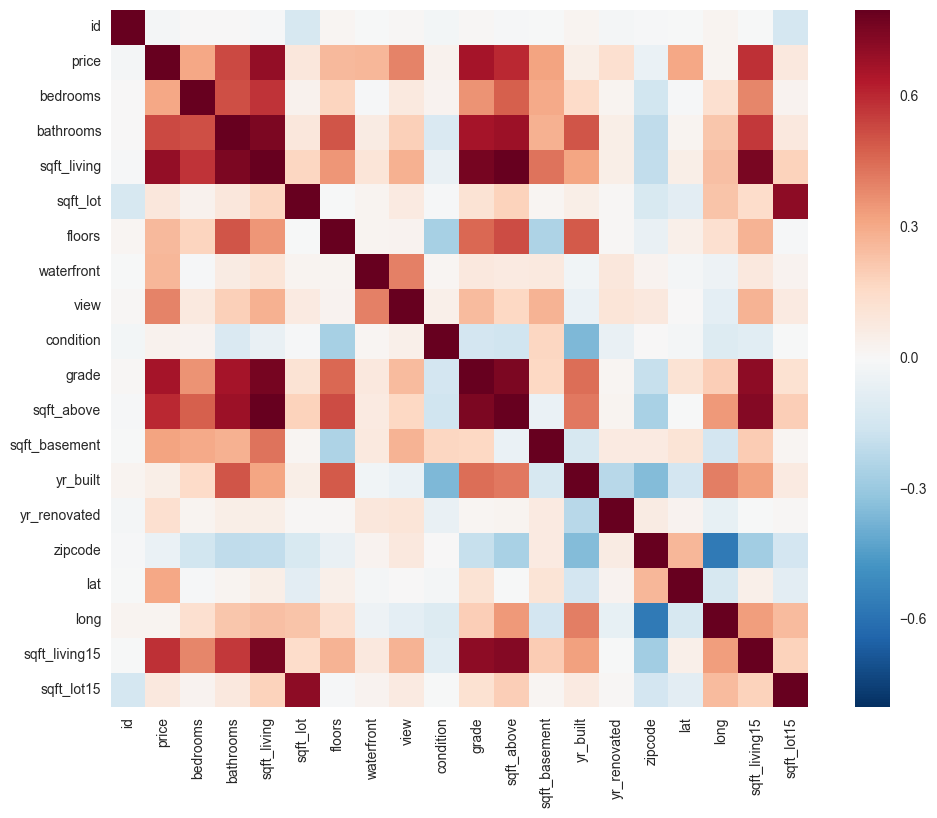

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
data2 = data
data2['number_yrs_built'] = 2015 - data2['yr_built']
data2['number_yrs_renovated'] = 2015 - data2['yr_renovated']
data2.loc[data2.yr_renovated == 0, 'number_yrs_renovated'] = data2['number_yrs_built']

In [14]:
data2.drop(['yr_built', 'yr_renovated'], 1)
corrmat2 = data2.corr()

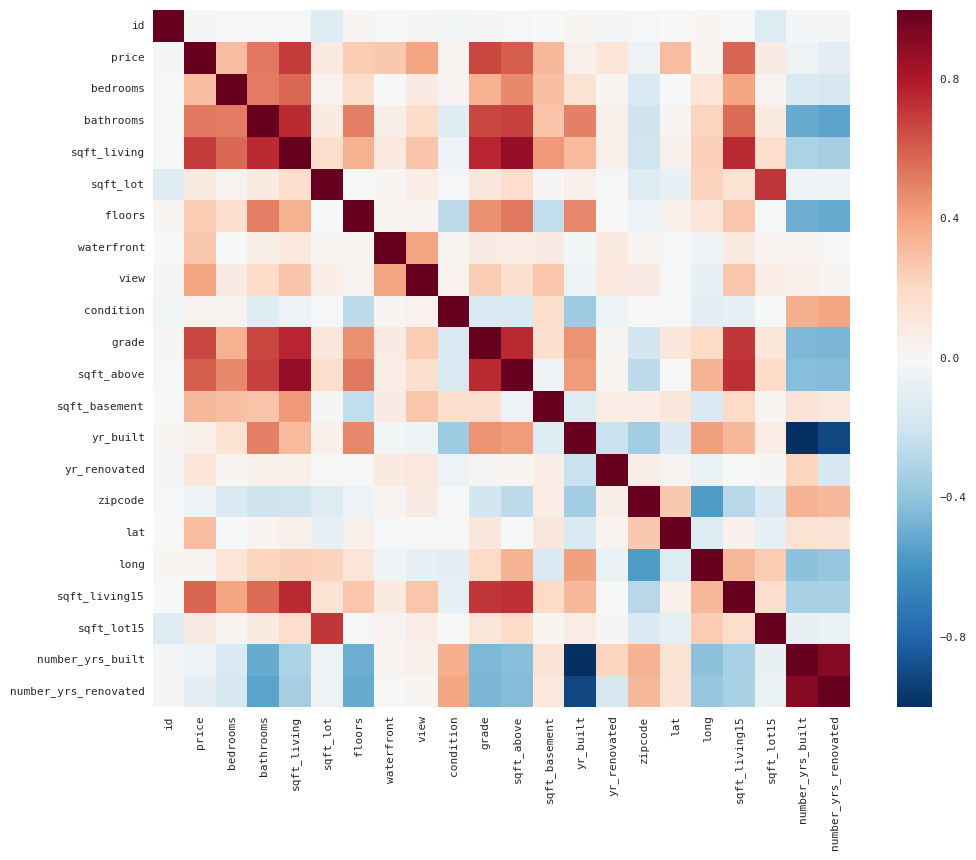

In [15]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat2, vmax=.8, square=True);

## Model 1: multiple linear regression

In [24]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']

In [25]:
mydata = data[features]

In [45]:
X = mydata.iloc[:, 1:]
y = mydata.iloc[:, 0]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(14480, 18)
(14480,)
(7133, 18)
(7133,)


In [73]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
for c, i in sorted(zip(regr.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.2f" % (i, c))

                 lat  | coef: 593711.34
          waterfront  | coef: 520262.96
               grade  | coef: 94306.35
                view  | coef: 55993.34
           bathrooms  | coef: 41823.95
           condition  | coef: 23327.21
              floors  | coef: 8434.74
         sqft_living  | coef: 107.87
          sqft_above  | coef: 68.48
       sqft_basement  | coef: 39.39
        yr_renovated  | coef: 21.45
       sqft_living15  | coef: 20.53
            sqft_lot  | coef: 0.11
          sqft_lot15  | coef: -0.34
             zipcode  | coef: -555.53
            yr_built  | coef: -2600.49
            bedrooms  | coef: -32525.39
                long  | coef: -192811.68


In [51]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Root mean squared error: 213134.00
Variance score: 0.70


## Model 2: Ridge regression

In [53]:
ridge = linear_model.RidgeCV()
ridge.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [55]:
ridge.alpha_

1.0

In [54]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((ridge.predict(X_test) - y_test) ** 2)))
print('Variance score: %.2f' % ridge.score(X_test, y_test))

Root mean squared error: 213178.72
Variance score: 0.70


In [90]:
for c, i in sorted(zip(ridge.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.2f" % (i, c))

                 lat  | coef: 591109.42
          waterfront  | coef: 514166.18
               grade  | coef: 94385.77
                view  | coef: 56208.29
           bathrooms  | coef: 41840.33
           condition  | coef: 23299.72
              floors  | coef: 8547.84
         sqft_living  | coef: 107.90
          sqft_above  | coef: 68.42
       sqft_basement  | coef: 39.48
        yr_renovated  | coef: 21.47
       sqft_living15  | coef: 20.50
            sqft_lot  | coef: 0.11
          sqft_lot15  | coef: -0.34
             zipcode  | coef: -552.78
            yr_built  | coef: -2605.06
            bedrooms  | coef: -32569.93
                long  | coef: -191441.38


### try with general ridge (no much different than RidgeCV)

In [62]:
ridge2 = linear_model.Ridge(alpha=0.1)
ridge2.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((ridge2.predict(X_test) - y_test) ** 2)))
print('Variance score: %.2f' % ridge2.score(X_test, y_test))

Root mean squared error: 213138.46
Variance score: 0.70


## Model 3: Lasso

In [56]:
lasso = linear_model.LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [57]:
lasso.alpha_

1312732.0081943136

In [58]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((lasso.predict(X_test) - y_test) ** 2)))
print('Variance score: %.2f' % lasso.score(X_test, y_test))

Root mean squared error: 269278.20
Variance score: 0.52


In [107]:
for c, i in sorted(zip(lasso.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.2f" % (i, c))

         sqft_living  | coef: 234.53
             zipcode  | coef: 100.06
       sqft_living15  | coef: 77.17
        yr_renovated  | coef: 71.84
       sqft_basement  | coef: 17.02
            sqft_lot  | coef: 0.04
          waterfront  | coef: 0.00
                view  | coef: 0.00
          sqft_above  | coef: -0.00
                long  | coef: -0.00
                 lat  | coef: 0.00
               grade  | coef: 0.00
              floors  | coef: 0.00
           condition  | coef: 0.00
            bedrooms  | coef: -0.00
           bathrooms  | coef: 0.00
          sqft_lot15  | coef: -0.72
            yr_built  | coef: -362.94


### try with general Lasso (much better than LassoCV)

In [103]:
lasso2 = linear_model.Lasso(alpha=10)
lasso2.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((lasso2.predict(X_test) - y_test) ** 2)))
print('Variance score: %.2f' % lasso2.score(X_test, y_test))

Root mean squared error: 213148.65
Variance score: 0.70


In [106]:
for c, i in sorted(zip(lasso2.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.2f" % (i, c))

                 lat  | coef: 593062.84
          waterfront  | coef: 518637.01
               grade  | coef: 94332.80
                view  | coef: 56044.53
           bathrooms  | coef: 41794.65
           condition  | coef: 23292.17
              floors  | coef: 8427.37
         sqft_living  | coef: 277.46
        yr_renovated  | coef: 21.46
       sqft_living15  | coef: 20.50
            sqft_lot  | coef: 0.11
          sqft_lot15  | coef: -0.35
          sqft_above  | coef: -101.10
       sqft_basement  | coef: -130.14
             zipcode  | coef: -554.14
            yr_built  | coef: -2601.89
            bedrooms  | coef: -32516.03
                long  | coef: -191884.17


## Model 4: Simple linear regression

In [71]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train[['sqft_living']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
print("Root mean squared error: %.2f"
      % np.sqrt(np.mean((regr2.predict(X_test[['sqft_living']]) - y_test) ** 2)))
print('Variance score (R^2): %.2f' % regr2.score(X_test[['sqft_living']], y_test))

Root mean squared error: 276975.13
Variance score (R^2): 0.49


In [76]:
X.columns

Index([u'bedrooms', u'bathrooms', u'sqft_living', u'sqft_lot', u'floors',
       u'waterfront', u'view', u'condition', u'grade', u'sqft_above',
       u'sqft_basement', u'yr_built', u'yr_renovated', u'zipcode', u'lat',
       u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [84]:
features[1:]

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']